In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import nltk

In [ ]:
from nltk.corpus import wordnet

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install transformers

In [ ]:
pip install nltk

In [ ]:
# Load the dataset
dataset1 = pd.read_csv('labelled_Smart_City_data_01_No_Undesirable.csv', encoding='ISO-8859-1',on_bad_lines='skip')

In [ ]:
dataset1

,Question,Answer,Label,Source URL,Source Title,Source Author
0,What is the main strategy of Smart Cities like...,Smart Cities like Barcelona base their strateg...,Strategy,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J."
1,What are the main components of Barcelona's Sm...,The main components of Barcelona's Smart City ...,Strategy,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J."
2,Why are governments investing in advanced infr...,Governments are investing in advanced infrastr...,Management,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J."
3,How are cities transforming to enhance their i...,Cities are undergoing fundamental transformati...,Strategy,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J."
4,How has Barcelona transformed itself into a Sm...,Barcelona has undertaken significant reforms t...,Management,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J."
...,...,...,...,...,...,...
589,How did South Korea control COVID-19 panic buy...,South Korea was able to control COVID-19 panic...,Management,https://penanginstitute.org/wp-content/uploads...,Smart City Technologies Take on COVID-57,Tan Lie Inn
590,What measures did South Korea take to track an...,South Korea implemented smartphone apps to tra...,Management,https://penanginstitute.org/wp-content/uploads...,Smart City Technologies Take on COVID-58,Tan Lie Inn
591,How did South Korea flatten its coronavirus cu...,South Korea was able to flatten its coronaviru...,Strategy,https://penanginstitute.org/wp-content/uploads...,Smart City Technologies Take on COVID-59,Tan Lie Inn
592,What was the secret to South Korea's success i...,The secret to South Korea's success in handlin...,Analysis,https://penanginstitute.org/wp-content/uploads...,Smart City Technologies Take on COVID-60,Tan Lie Inn


In [ ]:
# Select the relevant columns
dataset_1a = dataset1[["Question","Answer","Label"]]

In [ ]:
# Drop rows with missing values
dataset_1a = dataset_1a.dropna()

In [ ]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def find_synonyms(word, num_synonyms=10):
    synonyms = []
    try:
        synonyms = model.most_similar(word, topn=num_synonyms)
    except KeyError:
        pass
    return synonyms

In [ ]:
import random

def replace_word_with_synonym(sentence, word):
    synonyms = find_synonyms(word)
    if synonyms:
        sentence = sentence.replace(word, random.choice(synonyms[1]))
    return sentence

In [ ]:
def generate_synonym_sentence(sentence):
    words = sentence.split()
    new_words = []
    for word in words:
        new_word = replace_word_with_synonym(sentence, word)
        if new_word:
            new_words.append(new_word)
        else:
            new_words.append(word)
    return " ".join(new_words)

In [ ]:
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

In [ ]:
# Add synonyms columns
df = dataset_1a
df['question_synonyms'] = df['Question'].apply(lambda x: ' '.join(get_synonyms(x.split()[0])))
df['answer_synonyms'] = df['Answer'].apply(lambda x: ' '.join(get_synonyms(x.split()[0])))

<ipython-input-42-310a241f2198>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_20, x='index', y='Label', inner='stick', palette='Dark2')


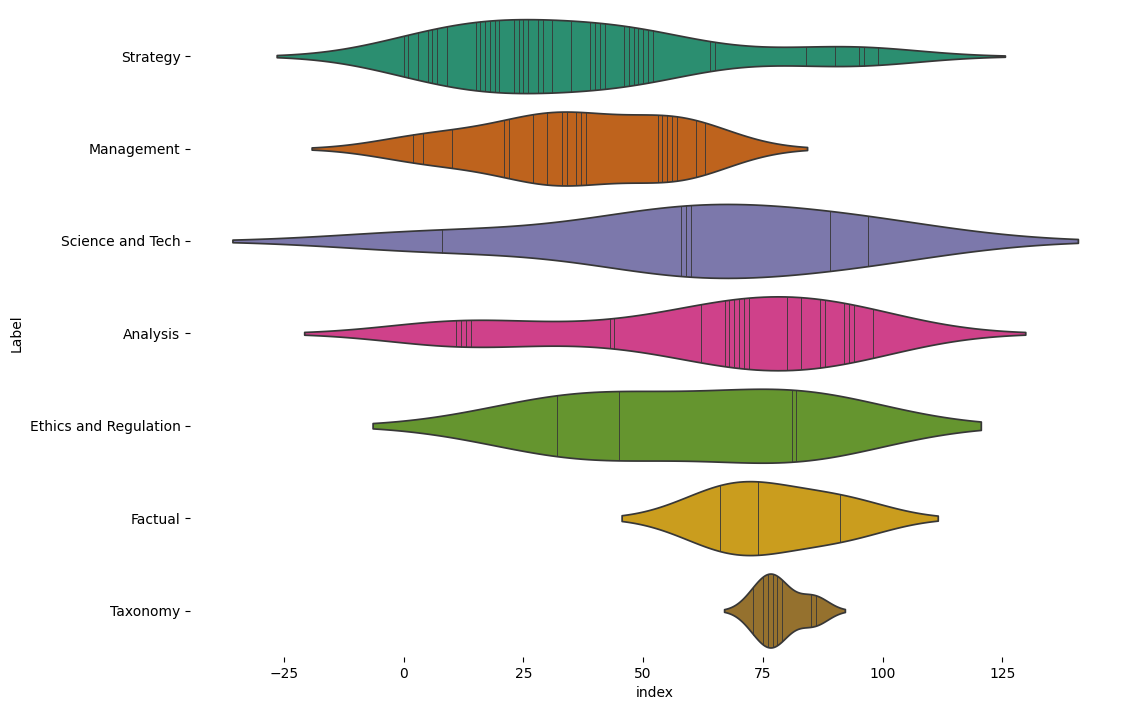

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='Label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

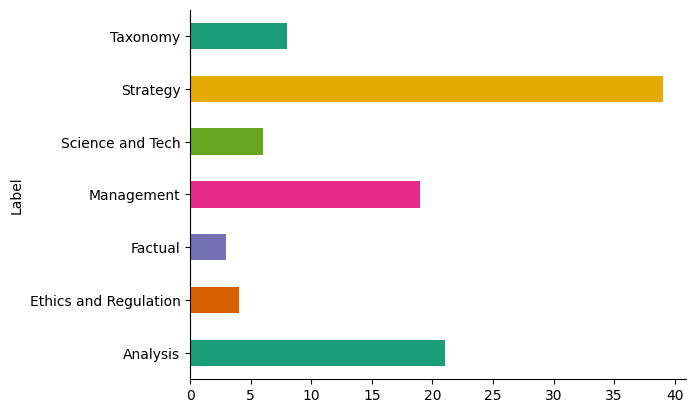

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Concatenate question and answer columns
df['text'] = df['Question'] + ' ' + df['Answer']

In [ ]:
df['text']

0      What is the main strategy of Smart Cities like...
1      What are the main components of Barcelona's Sm...
2      Why are governments investing in advanced infr...
3      How are cities transforming to enhance their i...
4      How has Barcelona transformed itself into a Sm...
                             ...                        
589    How did South Korea control COVID-19 panic buy...
590    What measures did South Korea take to track an...
591    How did South Korea flatten its coronavirus cu...
592    What was the secret to South Korea's success i...
593    What did the World Health Organization state r...
Name: text, Length: 594, dtype: object

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [ ]:
# Load the pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Preprocess the data
def preprocess_data(questions, answers):
    inputs = tokenizer(Question + " " + Answers, padding=True, truncation=True, max_length=512, return_tensors="pt")
    labels = torch.tensor([0] * len(Questions))
    return inputs, labels

In [ ]:
# Create a new classification layer on top of the pre-trained model
model.classifier = torch.nn.Linear(in_features=model.config.hidden_size, out_features=2)

In [ ]:
# Fine-tune the model
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Fine-tune the model
# for epoch in range(100):
#     for batch in train_loader:
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         label = batch['label'].to(device)

#         optimizer.zero_grad()
#         output = model(input_ids, attention_mask=attention_mask)
#         loss = loss_fn(output.logits, label)
#         loss.backward()
#         optimizer.step()



In [ ]:
def predict_label(text):
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs)
    preds = outputs.logits.argmax(-1).item()
    return preds

In [ ]:
df['label'] = df['Question'] + ' ' + df['Answer']
df['label'] = df['label'].apply(predict_label)

In [ ]:
from matplotlib import pyplot as plt
_df_23['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Data Augmentation

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import random
import nlpaug.augmenter.word as naw
import torch
import transformers
from torch.utils.data import Dataset

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_seq_length, aug_prob=0.5):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length
        self.aug_prob = aug_prob

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Apply data augmentation with probability aug_prob
        if random.random() < self.aug_prob:
            text_aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")(text)
        else:
            text_aug = text

        # Tokenize the input and convert to PyTorch tensors
        input_ids = torch.tensor(self.tokenizer.encode(text_aug, add_special_tokens=True, max_length=self.max_seq_length, padding='max_length', truncation=True))
        attention_mask = torch.where(input_ids != 0, torch.tensor(1), torch.tensor(0))

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': torch.tensor(label)}

In [ ]:
model_name = 'bert-base-uncased'
model = transformers.BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
tokenizer = transformers.BertTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Load the dataset
texts = ['What is the main strategy of Smart Cities like Barcelona?',
         'What are the main components of Barcelona\'s Smart City infrastructure?',
         'Why are governments investing in advanced infrastructure?',
         'How are cities transforming to enhance their infrastructure and services?',
         'How has Barcelona transformed itself into a Smart City?']
labels = [0, 0, 1, 0, 1]

# Define the maximum sequence length and augmentation probability
max_seq_length = 128
aug_prob = 0.5

# Create the dataset and apply data augmentation
dataset = TextDataset(texts, labels, tokenizer, max_seq_length, aug_prob)

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import wordnet
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the original dataset
dataset1 = pd.read_csv('labelled_Contradictory_Sustainable_Urban_Mobility_data_No_Undesirable.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Load additional datasets
datasets = ['labelled_Smart_City_data_01_No_Undesirable.csv', 'labelled_Smart_City_data_02_No_Undesirable.csv', 'labelled_Sustainable_Urban_Mobility_data_01_No_Undesirable.csv', 'labelled_Sustainable_Urban_Mobility_data_02_No_Undesirable.csv', 'labelled_Sustainable_Urban_Mobility_data_03_No_Undesirable.csv']

# Concatenate all datasets
dfs = []
for file in datasets:
    df_temp = pd.read_csv(file, encoding='ISO-8859-1', on_bad_lines='skip')
    dfs.append(df_temp)

df_all = pd.concat([dataset1] + dfs, ignore_index=True)

# Select the relevant columns
df = df_all[["Question", "Answer", "Label"]]

# Drop rows with missing values
df = df.dropna()

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Add synonyms columns
df['question_synonyms'] = df['Question'].apply(lambda x: ' '.join(get_synonyms(x.split()[0])))
df['answer_synonyms'] = df['Answer'].apply(lambda x: ' '.join(get_synonyms(x.split()[0])))

# Encode labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Load the pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(df['Label'].unique()))

# Split data into training and testing sets
X = df['Question'] + ' ' + df['Answer']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prediction function
def predict_label(text):
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs)
    preds = outputs.logits.argmax(-1).item()
    return preds

# Train and predict on the training set
df_train = pd.DataFrame({'Question': X_train, 'Answer': X_train, 'Label': y_train})
df_train['predicted_label'] = df_train.apply(lambda row: predict_label(row['Question'] + ' ' + row['Answer']), axis=1)

# Train and predict on the testing set
df_test = pd.DataFrame({'Question': X_test, 'Answer': X_test, 'Label': y_test})
df_test['predicted_label'] = df_test.apply(lambda row: predict_label(row['Question'] + ' ' + row['Answer']), axis=1)

# Display the DataFrame with predicted labels for training and testing sets
print("Training Set:")
print(df_train)

print("Testing Set:")
print(df_test)

# Assuming 'Label' column is the ground truth and 'predicted_label' column is the predicted labels
y_true_train = df_train['Label']
y_pred_train = df_train['predicted_label']

y_true_test = df_test['Label']
y_pred_test = df_test['predicted_label']

# Calculate metrics for training set
accuracy_train = accuracy_score(y_true_train, y_pred_train)
precision_train = precision_score(y_true_train, y_pred_train, average='weighted')
recall_train = recall_score(y_true_train, y_pred_train, average='weighted')
f1_train = f1_score(y_true_train, y_pred_train, average='weighted')

# Calculate metrics for testing set
accuracy_test = accuracy_score(y_true_test, y_pred_test)
precision_test = precision_score(y_true_test, y_pred_test, average='weighted')
recall_test = recall_score(y_true_test, y_pred_test, average='weighted')
f1_test = f1_score(y_true_test, y_pred_test, average='weighted')

print("\nMetrics for Training Set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

print("\nMetrics for Testing Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import spacy
import random
import torch
from transformers import BertForSequenceClassification, BertTokenizer

In [14]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# Load datasets
datasets = ['labelled_Smart_City_data_01_No_Undesirable.csv', 'labelled_Smart_City_data_02_No_Undesirable.csv', 'labelled_Sustainable_Urban_Mobility_data_01_No_Undesirable.csv', 'labelled_Sustainable_Urban_Mobility_data_02_No_Undesirable.csv', 'labelled_Sustainable_Urban_Mobility_data_03_No_Undesirable.csv']
datasets

['labelled_Smart_City_data_01_No_Undesirable.csv',
 'labelled_Smart_City_data_02_No_Undesirable.csv',
 'labelled_Sustainable_Urban_Mobility_data_01_No_Undesirable.csv',
 'labelled_Sustainable_Urban_Mobility_data_02_No_Undesirable.csv',
 'labelled_Sustainable_Urban_Mobility_data_03_No_Undesirable.csv']

In [16]:
dfs = []
for file in datasets:
    df_temp = pd.read_csv(file, encoding='ISO-8859-1', on_bad_lines='skip')
    dfs.append(df_temp)


In [17]:
# Concatenate datasets
dataset1 = pd.read_csv('labelled_Smart_City_data_01_No_Undesirable.csv', encoding='ISO-8859-1', on_bad_lines='skip')
df_all = pd.concat([dataset1] + dfs, ignore_index=True)


In [18]:
df_all

,Question,Answer,Label,Source URL,Source Title,Source Author,Unnamed: 0,Unnamed: 3
0,What is the main strategy of Smart Cities like...,Smart Cities like Barcelona base their strateg...,Strategy,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J.",NaN,NaN
1,What are the main components of Barcelona's Sm...,The main components of Barcelona's Smart City ...,Strategy,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J.",NaN,NaN
2,Why are governments investing in advanced infr...,Governments are investing in advanced infrastr...,Management,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J.",NaN,NaN
3,How are cities transforming to enhance their i...,Cities are undergoing fundamental transformati...,Strategy,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J.",NaN,NaN
4,How has Barcelona transformed itself into a Sm...,Barcelona has undertaken significant reforms t...,Management,https://link.springer.com/article/10.1007/s131...,A Smart City Initiative the Case of Barcelona,"Basic, T., Admiral, E. & Wareham, J.",NaN,NaN
...,...,...,...,...,...,...,...,...
8191,Why is assessing current mobility conditions c...,Assessing current mobility conditions is neces...,Management,NaN,NaN,NaN,NaN,NaN
8192,How are indicators used to assess sustainable ...,Indicators are used to assess sustainable urba...,Management,NaN,NaN,NaN,NaN,NaN
8193,What are some challenges in using indicator se...,One of the challenges is the large number of i...,Management,NaN,NaN,NaN,NaN,NaN
8194,What are some potential drawbacks of autonomou...,The large-scale potential of autonomous pooled...,Analysis,NaN,NaN,NaN,NaN,NaN


In [19]:
# Select relevant columns and drop missing values
dataset_1 = df_all[["Question", "Answer", "Label"]].dropna()

In [20]:
dataset_1

,Question,Answer,Label
0,What is the main strategy of Smart Cities like...,Smart Cities like Barcelona base their strateg...,Strategy
1,What are the main components of Barcelona's Sm...,The main components of Barcelona's Smart City ...,Strategy
2,Why are governments investing in advanced infr...,Governments are investing in advanced infrastr...,Management
3,How are cities transforming to enhance their i...,Cities are undergoing fundamental transformati...,Strategy
4,How has Barcelona transformed itself into a Sm...,Barcelona has undertaken significant reforms t...,Management
...,...,...,...
8191,Why is assessing current mobility conditions c...,Assessing current mobility conditions is neces...,Management
8192,How are indicators used to assess sustainable ...,Indicators are used to assess sustainable urba...,Management
8193,What are some challenges in using indicator se...,One of the challenges is the large number of i...,Management
8194,What are some potential drawbacks of autonomou...,The large-scale potential of autonomous pooled...,Analysis


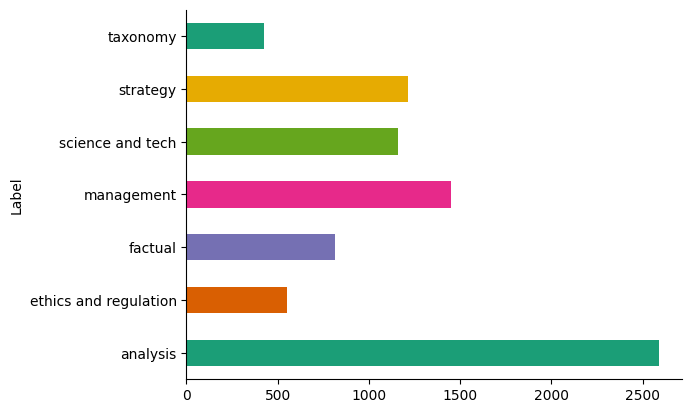

In [25]:
# @title Label

from matplotlib import pyplot as plt
import seaborn as sns
dataset_1.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Label'>

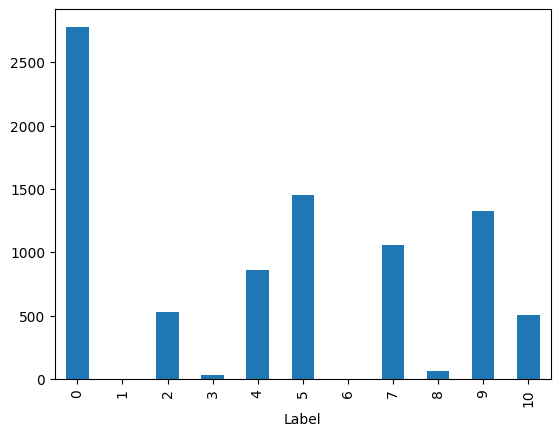

In [24]:
# @title Questions per Label

df.groupby('Label')['Question'].count().plot(kind='bar')

In [21]:
# Preprocess labels
label_mapping = {
    'Taxonomy': 'taxonomy',
    'Science and Tech': 'science and tech',
    'Science and Tech ': 'science and tech',
    'Science and tech': 'science and tech',
    'Strategy': 'strategy',
    'Management': 'management',
    'Analysis': 'analysis',
    'Factual': 'factual',
    'Ethics and regulation': 'ethics and regulation',
    'Ethics and Regulation': 'ethics and regulation'
}
dataset_1['Label'] = dataset_1['Label'].map(label_mapping)

In [22]:
# Filter relevant labels
relevant_labels = ['strategy', 'science and tech', 'analysis', 'factual', 'taxonomy', 'management', 'ethics and regulation']
dataset_2 = dataset_1[dataset_1['Label'].isin(relevant_labels)]

In [23]:
# Preprocess text
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [24]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)


In [25]:
dataset_2['clean_text'] = dataset_2['Question'] + ' ' + dataset_2['Answer']
dataset_2['clean_text'] = dataset_2['clean_text'].apply(preprocess_text)

<ipython-input-25-b64547126544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['clean_text'] = dataset_2['Question'] + ' ' + dataset_2['Answer']
<ipython-input-25-b64547126544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2['clean_text'] = dataset_2['clean_text'].apply(preprocess_text)


In [26]:
# Function to find synonyms using WordNet
def find_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

In [27]:
# Function to replace words with synonyms in a sentence
def replace_with_synonyms(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        synonyms = find_synonyms(word)
        if synonyms:
            new_sentence.append(random.choice(synonyms))
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)


In [28]:
# Augment the training data with synonyms
X_train_augmented = dataset_2['clean_text'].apply(replace_with_synonyms)

In [29]:
X_train_augmented

0       principal scheme impertinent city similar Barc...
1       chief portion Barcelona smart urban_center sch...
2       governance clothe advanced infrastructure sust...
3       metropolis transmute raise international compe...
4       Barcelona translate saucy metropolis Barcelona...
                              ...                        
8191    valuate stream mobility stipulate consider ess...
8192    indicator used tail_end sustainable urban mobi...
8193    challenge utilise indicator specify value sust...
8194    voltage drawback autonomous pool taxi large sc...
8195    N emanation compare Centennial_State emission ...
Name: clean_text, Length: 8194, dtype: object

In [30]:
# Combine original and augmented training data
X_train_combined = pd.concat([dataset_2['clean_text'], X_train_augmented], ignore_index=True)
y_train_combined = pd.concat([dataset_2['Label'], dataset_2['Label']], ignore_index=True)

In [31]:
# Tokenize and encode the combined training data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_inputs_combined = tokenizer(X_train_combined.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
train_labels_combined = torch.tensor(LabelEncoder().fit_transform(y_train_combined.tolist()))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [32]:
# Load the pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y_train_combined)))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [33]:
# Fine-tune the model with the combined training data
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Train the model
epochs = 3
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(**train_inputs_combined, labels=train_labels_combined)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

In [ ]:
# Evaluate the model
def evaluate_model(inputs, labels):
    model.eval()
    outputs = model(**inputs)
    predicted_labels = outputs.logits.argmax(-1)
    accuracy = accuracy_score(labels.numpy(), predicted_labels.numpy())
    precision = precision_score(labels.numpy(), predicted_labels.numpy(), average='weighted')
    recall = recall_score(labels.numpy(), predicted_labels.numpy(), average='weighted')
    f1 = f1_score(labels.numpy(), predicted_labels.numpy(), average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(train_inputs_combined, train_labels_combined)
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(test_inputs, test_labels)

In [ ]:
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}, F1 Score: {train_f1}")

print("Testing Set Metrics:")
print(f"Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}")

In [ ]:
# Predict labels for the training set
train_predictions = torch.argmax(model(train_inputs_combined['input_ids'], train_inputs_combined['attention_mask']).logits, dim=1).numpy()
train_predicted_labels = [label_encoder.classes_[label] for label in train_predictions]

In [ ]:
# Predict labels for the testing set
test_predictions = torch.argmax(model(test_inputs['input_ids'], test_inputs['attention_mask']).logits, dim=1).numpy()
test_predicted_labels = [label_encoder.classes_[label] for label in test_predictions]

In [ ]:
# Print actual and predicted labels for the testing set
print("Actual Labels:", y_test.tolist())
print("Predicted Labels:", test_predicted_labels)

In [ ]:
# Tokenize and encode new data
new_data = ["What is the capital of France?", "What is the largest ocean in the world?"]
new_inputs = tokenizer(new_data, padding=True, truncation=True, max_length=512, return_tensors="pt")

# Make predictions on new data
model.eval()
outputs = model(**new_inputs)
predicted_labels = outputs.logits.argmax(-1)

# Decode predicted labels
predicted_labels = label_encoder.inverse_transform(predicted_labels.numpy())
print("Predicted Labels:", predicted_labels)